# Analyse the results found in predictions folders

In [1]:
import pandas as pd
import numpy as np
import os 
import shutil
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tqdm import tqdm 


## Preamble

In [2]:
# location paths 

path_to_annotations = "F:\\DATA\\JSmith_SAFER_20220310\\raw_data\\Feas2\\rec_data_anon.csv"
path_to_keys_for_annotations = "F:\\DATA\\JSmith_SAFER_20220310\\raw_data\\Feas2\\rec_data_anon_diag_key.csv"
path_to_predictions = "D:\\OneDrive - University of Cambridge\\11B\\Project\\predictions\\F_DATA_JSmith_SAFER_20220310_preprocessed_labelled_data_Feas2answers.csv"

column_names = ["path_to_sample", "N_probability", "A_probability", "O_probability", "~_probability"]

# Parse the neccessary spreadsheets
annotations_df = pd.read_csv(path_to_annotations) 
diag_key_df = pd.read_csv(path_to_keys_for_annotations) 
# predictions_df = pd.read_csv(path_to_predictions, names= column_names)
predictions_anonymous_save_path = "..\\2_data\\data_analysis\\feas2_results.csv"
dataset_name = "Feas2"

C:\Users\Jordan\Anaconda3\envs\tf-NNN-build\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# predictions_df

In [4]:
# for index in predictions_df.index:
    
#     for column_name in column_names[1:]:
#         try: 
#             predictions_df.loc[index, column_name] = float(predictions_df.loc[index, column_name])
#         except ValueError:
#             predictions_df.loc[index, column_name] = float(predictions_df.loc[index, column_name][3:])

# predictions_df

### Add labels to predictions dataframe

In [5]:
decode_diagnosis_dict = {k: v for k, v in zip(diag_key_df.num.to_list(),diag_key_df.txt.to_list())} 
decode_diagnosis_dict

{1: 'AF >= 30 seconds',
 2: 'Cannot exclude AF>=30 seconds, VT or 2/3 degree heart block',
 3: 'No AF >= 30 secs, VT or 2/3 degree heart block detected',
 4: 'Poor quality',
 5: 'Screening Failure',
 6: 'Undecided',
 -1: 'Disagreement between reviewers'}

In [6]:
diag_from_code = {"A": 1, "Maybe A": 2, "N": 3, "O": []}

In [7]:
annotations_df

,ptID,age,gender,noWeeks,ptDiag,ptDiagRev1,ptDiagRev2,ptDiagRev3,cardRev,measNo,...,tag_orig_Poor_Quality,tag_orig_Slow_Episode,tag_orig_Slow_Regular,tag_orig_Trigemini,tag_orig_Wide_QRS,poss_AF_tag,not_tagged,presNoAF,presAF,measID
0,1,74.5,1.0,3,3,3,6,6,1,1,...,0,0,0,0,0,0,1,1,0,1
1,1,74.5,1.0,3,3,3,6,6,1,2,...,0,0,0,0,0,0,1,1,0,2
2,1,74.5,1.0,3,3,3,6,6,1,3,...,0,0,0,0,0,0,1,1,0,3
3,1,74.5,1.0,3,3,3,6,6,1,4,...,0,0,0,0,0,0,1,1,0,4
4,1,74.5,1.0,3,3,3,6,6,1,5,...,0,0,0,0,0,0,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,287,88.0,2.0,3,3,3,6,6,1,77,...,0,0,0,0,1,0,0,0,0,23249
23249,287,88.0,2.0,3,3,3,6,6,1,78,...,0,0,0,0,1,1,0,0,0,23250
23250,287,88.0,2.0,3,3,3,6,6,1,79,...,0,0,0,0,1,1,0,0,0,23251
23251,287,88.0,2.0,3,3,3,6,6,1,80,...,0,0,0,0,1,1,0,0,0,23252


In [8]:
# predictions_df["Label"] = ["None" for i in range(len(predictions_df.index))]
# predictions_df["ptID"] = [0 for i in range(len(predictions_df.index))]

# rows_to_drop = []

# for i in tqdm(predictions_df.index):
#     file = predictions_df.loc[i, "path_to_sample"]
#     measID = int(file.split("_")[-1])
#     annotations_df_row_for_file = annotations_df[annotations_df.measID == measID]
#     diag_ = annotations_df_row_for_file.measDiag.to_list()[0]
#     diag_rev1 = annotations_df_row_for_file.measDiagRev1.to_list()[0]
#     diag_rev2 = annotations_df_row_for_file.measDiagRev2.to_list()[0]
#     ptID = int(annotations_df_row_for_file.ptID)
#     all_diag = [diag_, diag_rev1, diag_rev2]
#     diagnosis_code_for_file = (2 if any([diag==2 for diag in all_diag]) else diag_)
#     if diagnosis_code_for_file == diag_from_code["A"]: predictions_df.loc[i, "Label"] = "A"
#     elif diagnosis_code_for_file == diag_from_code["Maybe A"]: predictions_df.loc[i, "Label"] = "Maybe A"
#     elif diagnosis_code_for_file == diag_from_code["N"]: predictions_df.loc[i, "Label"] = "N"
#     elif diagnosis_code_for_file in diag_from_code["O"]:  predictions_df.loc[i, "Label"] = "O"
#     else: rows_to_drop.append(i)
#     predictions_df.loc[i, "ptID"] = ptID

# predictions_df.drop(rows_to_drop, inplace=True) # get rid of rows with label that is not useful     
    

In [9]:
# predictions_df

In [10]:
# ptID_real = sorted(list(set(list(predictions_df.ptID))))
# ptID_fake = np.arange(0,len(ptID_real)) + 0.5
# ptID_conversion = {real: fake for real, fake in zip(ptID_real, ptID_fake)}
# predictions_df_for_saving = predictions_df.copy()

# for i in tqdm(predictions_df_for_saving.index):
#     ptID_real = predictions_df_for_saving.loc[i, "ptID"] 
#     predictions_df_for_saving.loc[i, "ptID"] = ptID_conversion[ptID_real] #complete anonymity
#     predictions_df_for_saving.loc[i, "path_to_sample"] = str(i)

# predictions_df_for_saving.to_csv(predictions_anonymous_save_path, index=False)

In [11]:
predictions_df = pd.read_csv(predictions_anonymous_save_path)
rows_to_drop = []
predictions_df

,path_to_sample,N_probability,A_probability,O_probability,~_probability,Label,ptID
0,1,0.0336,0.0227,0.9396,0.0042,N,0.5
1,2,0.0482,0.0028,0.9477,0.0014,N,0.5
2,3,0.5549,0.0031,0.4378,0.0042,N,0.5
3,4,0.0558,0.0033,0.9400,0.0010,N,0.5
4,5,0.2460,0.0040,0.7490,0.0009,N,0.5
...,...,...,...,...,...,...,...
771,1236,0.7317,0.0016,0.2655,0.0013,N,119.5
772,1237,0.9714,0.0007,0.0273,0.0006,N,119.5
773,1238,0.5728,0.0023,0.4230,0.0019,N,119.5
774,1239,0.9713,0.0006,0.0275,0.0006,N,119.5


# Analyse these predictions

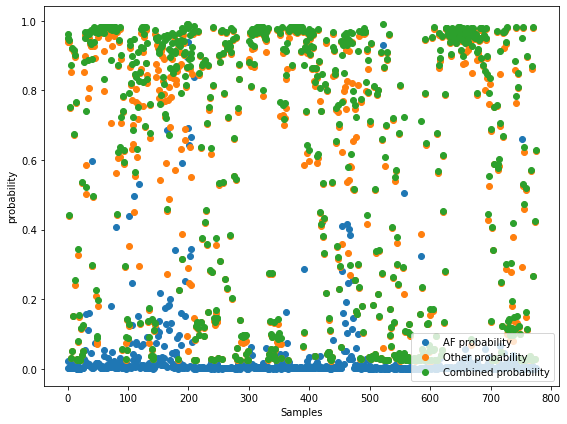

In [12]:
y_a = np.array(predictions_df.A_probability.to_list())
y_o = np.array(predictions_df.O_probability.to_list())
x = np.arange(max(y_a.size, y_o.size))  

plt.figure(figsize=(8, 6))

plt.scatter(x, y_a, label="AF probability")
plt.scatter(x, y_o, label="Other probability")
plt.scatter(x, y_a+y_o, label= "Combined probability")
plt.legend(loc="lower right")
plt.ylabel("probability")
plt.xlabel("Samples")
# plt.title("Prediction probabilities for samples labelled as AF")
plt.tight_layout()

Clearly a combination of both AF and other lead to a greater likelihood of an AF sample having a high predicted probability

In [13]:
def plot_probilities_of_class_predicted_by_model(data_arr_probabilites_and_labels, prediction_class):
    # assigns colour codes and x values for plotting
    colour_code_dict = {"A":"r", "O":"orange", "N":"g", "~":"grey", "Maybe A":"purple"}
    x_dict_for_class = {"N":0, "O":1, "Maybe A":2, "A":3}
    x_dict_for_class_inv = {0:"N", 1:"O", 2:"Maybe A", 3:"A"}

    for i in range(int(data_arr_probabilites_and_labels.size/2)):
        if data_arr_probabilites_and_labels[i][1] == "None":
            print(data_arr_probabilites_and_labels[i], i)

    # divide data into different classes defined by labels
    af_data = data_arr_probabilites_and_labels[data_arr_probabilites_and_labels.T[1] == "A"] 
    other_data = data_arr_probabilites_and_labels[data_arr_probabilites_and_labels.T[1] == "O"] 
    normal_data = data_arr_probabilites_and_labels[data_arr_probabilites_and_labels.T[1] == "N"] 
    maybe_af_data = data_arr_probabilites_and_labels[data_arr_probabilites_and_labels.T[1] == "Maybe A"] 
    data_for_plotting = [(i,data_) for i,data_ in enumerate([af_data, other_data, normal_data, maybe_af_data]) if len(data_) != 0]
    indices_used = [i for i,data_ in data_for_plotting]
    
    _index_to_label = {0:"A", 1:"O", 2:"N", 3:"Maybe A"} 
    fig, ax = plt.subplots(figsize=(12, 6))
    tick_location = []

    for i,data_ in data_for_plotting:

        #plot the scatter points
        label_ = _index_to_label[i]
        colour = colour_code_dict[label_]
        data_ = np.sort(data_,0)
        offset_arr = np.linspace(0,0.5,data_.shape[0])
        x_ = np.array([x_dict_for_class[label_]]*data_.shape[0]) + offset_arr
        y_ = data_.T[0]
        ax.scatter(x_,y_,color=colour,s=1)
        tick_location.append(np.mean(x_))

        #plot the averages and quartile ranges
        mean_ = np.mean(y_)
        std_ = np.std(y_)
        ax.hlines(mean_,x_[0], x_[-1],color=colour, linewidth=5)
        ax.hlines(mean_+std_,x_[0], x_[-1],color=colour, linestyle="dotted", linewidth=5)
        ax.hlines(mean_-std_,x_[0], x_[-1],color=colour, linestyle="dotted", linewidth=5)


    ax.grid()
    tick_location.sort()
    ax.set_xticks(tick_location)
    ax.set_xticklabels([["Normal Rhythm", "Other", "Maybe AF or Other", "AF"][i] for i in indices_used])
    ax.set_ylabel(f"Probability of {prediction_class} prediction")
    ax.set_xlabel("Label assigned by Cardiologist")
    ax.set_title(f"Model prediction probabilities of {prediction_class} for all labelled samples {dataset_name}")

#### Plot the probabilities of AF predicted by the model for datapoints for different labels the Cardiologists created

In [14]:
# create an array of probabilities of AF predicted, with the labels for that sample
A_probabilities_and_labels_arr = np.zeros((predictions_df.shape[0] + len(rows_to_drop), 2), dtype=object)

for index in predictions_df.index:
    A_prob, label = predictions_df.loc[index, ["A_probability", "Label"]]
    A_probabilities_and_labels_arr[index,0] = A_prob
    A_probabilities_and_labels_arr[index,1] = label

# delete rows which are ignored because they were removed from df as no label found of use
arr_rows_to_delete = []
for i,label in enumerate(A_probabilities_and_labels_arr.T[1]):
    if label == 0:
        arr_rows_to_delete.append(i)
A_probabilities_and_labels_arr = np.delete(A_probabilities_and_labels_arr, arr_rows_to_delete, 0)
A_probabilities_and_labels_arr

array([[0.0227, 'N'],
       [0.0028, 'N'],
       [0.0031, 'N'],
       ...,
       [0.0023, 'N'],
       [0.0006, 'N'],
       [0.0025, 'N']], dtype=object)

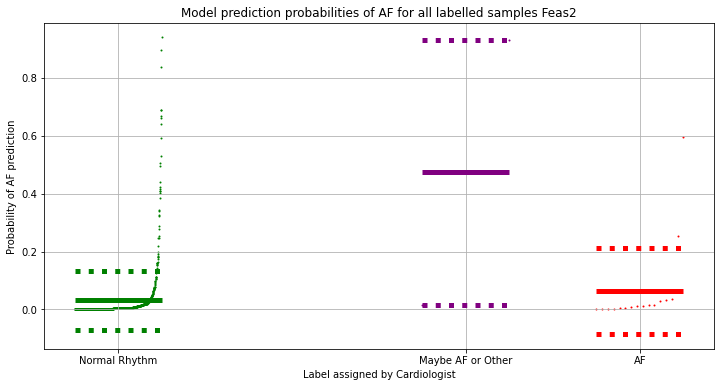

In [15]:
plot_probilities_of_class_predicted_by_model(A_probabilities_and_labels_arr, "AF")

#### Plot the probabilities of Other predicted by the model for datapoints for different labels the Cardiologists created

In [16]:
# create an array of probabilities of AF predicted, with the labels for that sample
O_probabilities_and_labels_arr = np.zeros((predictions_df.shape[0] + len(rows_to_drop), 2), dtype=object)

for index in predictions_df.index:
    O_prob, label = predictions_df.loc[index, ["O_probability", "Label"]]
    O_probabilities_and_labels_arr[index,0] = O_prob
    O_probabilities_and_labels_arr[index,1] = label

# delete rows which are ignored because they were removed from df as no label found of use
arr_rows_to_delete = []
for i,label in enumerate(O_probabilities_and_labels_arr.T[1]):
    if label == 0:
        arr_rows_to_delete.append(i)
O_probabilities_and_labels_arr = np.delete(O_probabilities_and_labels_arr, arr_rows_to_delete, 0)
O_probabilities_and_labels_arr

array([[0.9396, 'N'],
       [0.9477, 'N'],
       [0.4378, 'N'],
       ...,
       [0.423, 'N'],
       [0.0275, 'N'],
       [0.6267, 'N']], dtype=object)

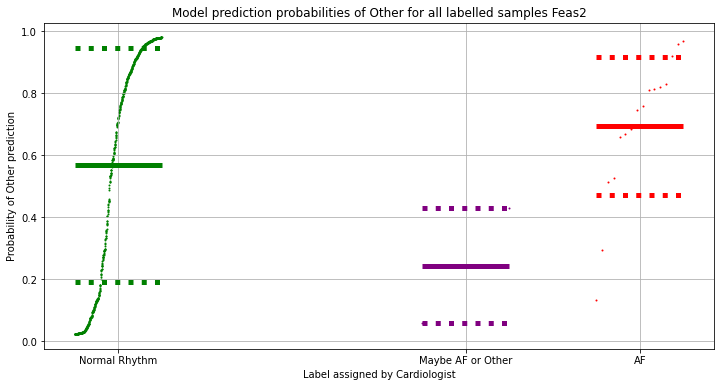

In [17]:
plot_probilities_of_class_predicted_by_model(O_probabilities_and_labels_arr, "Other")

### Use prob(AF) = 1-prob(Normal) method and compare results to 1) AF prob 2) combined AF and O prob

## Calculate the percentage increase in efficiency with model used vs original ordering

In [18]:
all_ptID = list(set(predictions_df.ptID))
all_ptID.sort()
samples_order_of_labels_for_ptID = {}

for ptID in all_ptID:
    all_ecgs_for_pt = predictions_df[predictions_df.ptID == ptID]
    all_ecgs_for_pt = all_ecgs_for_pt.sort_values(by=["A_probability"], ascending=False)
    samples_order_of_labels_for_ptID[ptID] = all_ecgs_for_pt
    
samples_sorted_by_no_per_pt = dict(sorted(samples_order_of_labels_for_ptID.items(), key=lambda item: len(item[1]), reverse=True))

[(key,len(samples_sorted_by_no_per_pt[key])) for key in samples_sorted_by_no_per_pt.keys()][:10]

[(98.5, 70),
 (16.5, 39),
 (26.5, 38),
 (50.5, 31),
 (42.5, 28),
 (38.5, 25),
 (57.5, 24),
 (75.5, 23),
 (84.5, 22),
 (67.5, 20)]

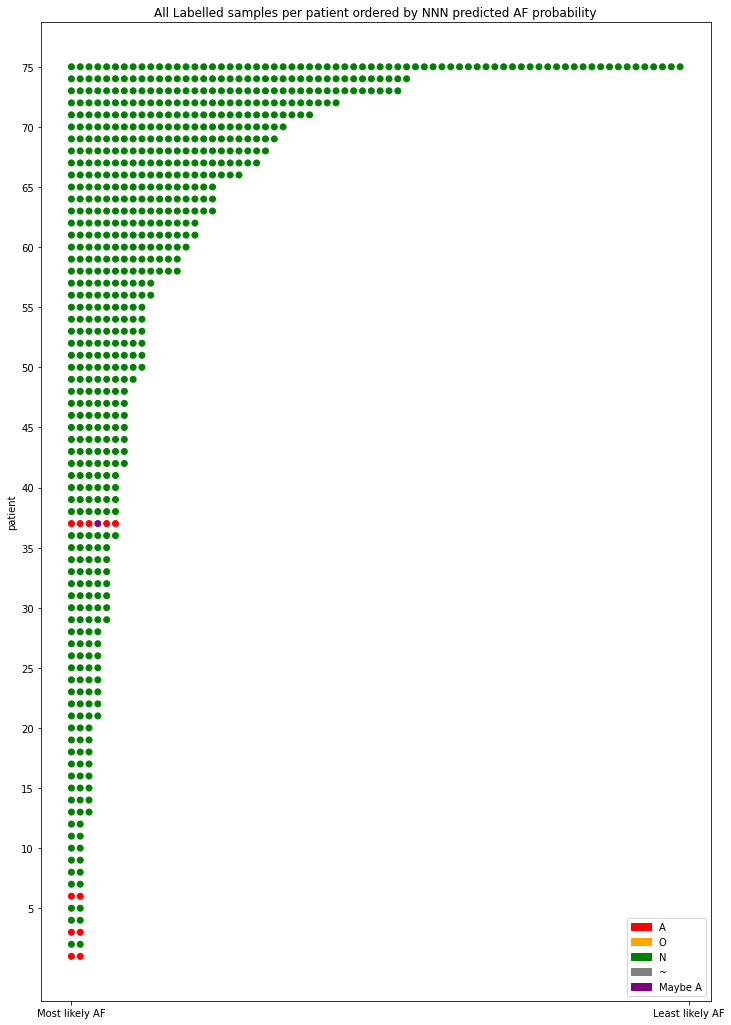

In [19]:
colour_code_dict = {"A":"r", "O":"orange", "N":"g", "~":"grey", "Maybe A":"purple"}
start_i = 75
fig, ax = plt.subplots(figsize=(12, 18))


for i, ptID in enumerate(list(samples_sorted_by_no_per_pt.keys())[:start_i]):
    samples = samples_sorted_by_no_per_pt[ptID]
    labels = samples.Label
    colours = [colour_code_dict[label] for label in labels]
    ax.scatter(np.arange(len(labels)), [start_i - i]*len(labels), c=colours)

ax.set_ylabel("patient")
ax.set_xticks([0,max([len(samples) for samples in samples_sorted_by_no_per_pt.values()])])
ax.set_xticklabels(["Most likely AF", "Least likely AF"])
ax.set_yticks([i+1 for i in range(start_i) if (i+1)%5 == 0])
ax.set_yticklabels([i+1 for i in range(start_i) if (i+1)%5 == 0])
ax.set_title(f"All Labelled samples per patient ordered by NNN predicted AF probability")

handles = [mpatches.Patch(color=v, label=k) for k,v in colour_code_dict.items()]
plt.legend(handles=handles)

1.0

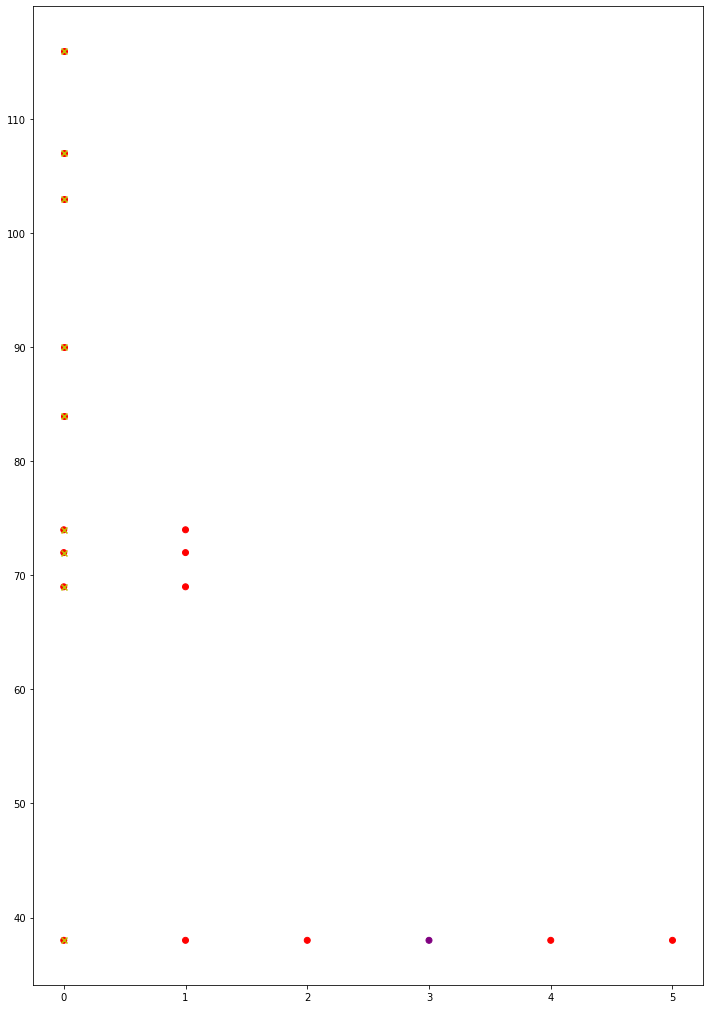

In [20]:
def is_af_present(all_samples_for_pt_df):
    if "A" in list(all_samples_for_pt_df.Label):
        return True
    else:
        return False

def find_index_of_first_AF_sample(all_samples_for_pt_df):
    for i,index in enumerate(all_samples_for_pt_df.index):
        if all_samples_for_pt_df.loc[index, "Label"] == "A":
            return i
    
fig, ax = plt.subplots(figsize=(12, 18))
proportion_save_data = []  

for i, ptID in enumerate(list(samples_sorted_by_no_per_pt.keys())):
    samples = samples_sorted_by_no_per_pt[ptID]
    if is_af_present(samples):
        first_AF_sample_index = find_index_of_first_AF_sample(samples)
        labels = samples.Label
        colours = [colour_code_dict[label] for label in labels]
        ax.scatter(np.arange(len(labels)), [i]*len(labels), c=colours)
        ax.scatter(first_AF_sample_index, i, marker="x", alpha=1, color="y")
        no_af_samples = 0
        no_non_af_samples = 0
        for label in labels:
            if label == "A": no_af_samples += 1
            else: no_non_af_samples += 1
            
        # saving_proportion_for_pt = ( len(labels) - first_AF_sample_index ) / len(labels)
        try:
            saving_proportion_for_pt = (no_non_af_samples - first_AF_sample_index) / no_non_af_samples
            proportion_save_data.append(saving_proportion_for_pt)
        except ZeroDivisionError:
            pass
            
np.mean(proportion_save_data)

A time saving for patients which showed AF signs in at least 1 scan of 91% is very good